# Comparisons, Masks, and Boolean Logic


- Use of Boolean masks to examine and manipulate values within NumPy arrays. Masking comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion: for example, you might wish to count all values greater than a certain value, or perhaps remove all outliers that are above some threshold.

# Example: Counting Rainy Days¶


In [26]:
import pandas as pd
rainfall=pd.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/Seattle2014.csv')
rainfall.head()

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140101,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140102,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
2,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140103,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999
3,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140104,0,0,0,78,6,27,40,40,45,58,1,-9999,-9999,-9999
4,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140105,0,0,0,83,-5,37,10,10,67,76,-9999,-9999,-9999,-9999


In [27]:
rain.shape

NameError: name 'rain' is not defined

In [28]:
rainfall['PRCP'].values

array([  0,  41,  15,   0,   0,   3, 122,  97,  58,  43, 213,  15,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   5,   0,   0,   0,   0,
         0,  89, 216,   0,  23,  20,   0,   0,   0,   0,   0,   0,  51,
         5, 183, 170,  46,  18,  94, 117, 264, 145, 152,  10,  30,  28,
        25,  61, 130,   3,   0,   0,   0,   5, 191, 107, 165, 467,  30,
         0, 323,  43, 188,   0,   0,   5,  69,  81, 277,   3,   0,   5,
         0,   0,   0,   0,   0,  41,  36,   3, 221, 140,   0,   0,   0,
         0,  25,   0,  46,   0,   0,  46,   0,   0,   0,   0,   0,   0,
         5, 109, 185,   0, 137,   0,  51, 142,  89, 124,   0,  33,  69,
         0,   0,   0,   0,   0, 333, 160,  51,   0,   0, 137,  20,   5,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
         0,  56,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  18,  64,   0,   5,  36,  13,   0,
         8,   3,   0,   0,   0,   0,   0,   0,  18,  23,   0,   

In [29]:
inches = rainfall['PRCP'].values / 254.0  # 1/10mm -> inches
inches

array([0.        , 0.16141732, 0.05905512, 0.        , 0.        ,
       0.01181102, 0.48031496, 0.38188976, 0.22834646, 0.16929134,
       0.83858268, 0.05905512, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01968504, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.3503937 , 0.8503937 , 0.        ,
       0.09055118, 0.07874016, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.2007874 , 0.01968504,
       0.72047244, 0.66929134, 0.18110236, 0.07086614, 0.37007874,
       0.46062992, 1.03937008, 0.57086614, 0.5984252 , 0.03937008,
       0.11811024, 0.11023622, 0.0984252 , 0.24015748, 0.51181102,
       0.01181102, 0.        , 0.        , 0.        , 0.01968504,
       0.7519685 , 0.42125984, 0.6496063 , 1.83858268, 0.11811024,
       0.        , 1.27165354, 0.16929134, 0.74015748, 0.        ,
       0.        , 0.01968504, 0.27165354, 0.31889764, 1.09055

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

(array([259.,  30.,  14.,  11.,   7.,  13.,   6.,   7.,   6.,   4.,   1.,
          2.,   0.,   2.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.09192913, 0.18385827, 0.2757874 , 0.36771654,
        0.45964567, 0.5515748 , 0.64350394, 0.73543307, 0.8273622 ,
        0.91929134, 1.01122047, 1.10314961, 1.19507874, 1.28700787,
        1.37893701, 1.47086614, 1.56279528, 1.65472441, 1.74665354,
        1.83858268]),
 <BarContainer object of 20 artists>)

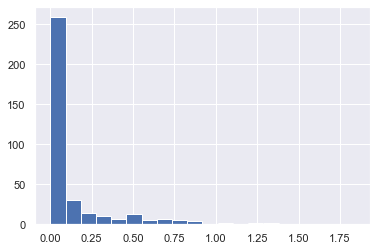

In [35]:
plt.hist(inches,20)

This histogram gives us a general idea of what the data looks like: despite its reputation, the vast majority of days in Seattle saw near zero measured rainfall in 2014. But this doesn't do a good job of conveying some information we'd like to see: for example, how many rainy days were there in the year? What is the average precipitation on those rainy days? How many days were there with more than half an inch of rain?

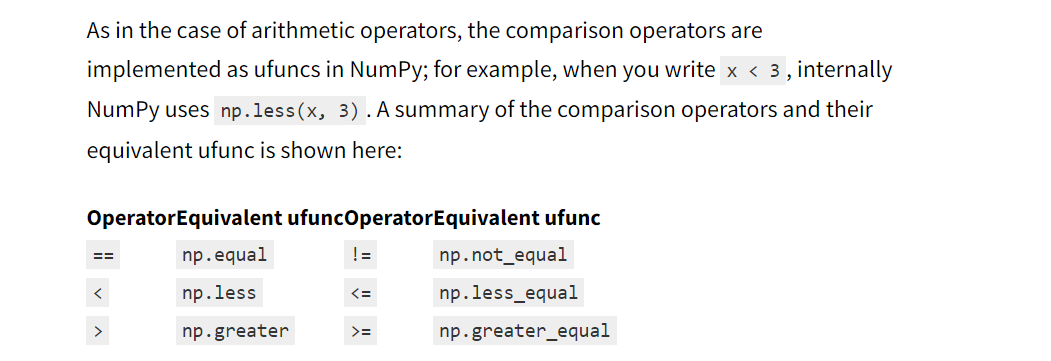

In [6]:
import numpy as np

In [7]:
x = np.array([1, 2, 3, 4, 5])

In [8]:
x<3

array([ True,  True, False, False, False])

In [9]:
x>3

array([False, False, False,  True,  True])

In [10]:
x>=3

array([False, False,  True,  True,  True])

In [11]:
x!=3

array([ True,  True, False,  True,  True])

In [12]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

In [13]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

# Working with Boolean Arrays


## Counting entries

In [14]:
# how many values less than 6?
np.count_nonzero(x<6)

8

In [15]:
np.sum(x<6)

8

In [16]:
np.sum(x<6,axis=0)

array([2, 2, 2, 2])

In [18]:
np.sum(x<6,axis=1)

array([4, 2, 2])

In [19]:
# are there any values greater than 8?
np.any(x > 8)

True

In [20]:
# are all values less than 10?
np.all(x < 10)

True

In [21]:
# are all values equal to 6?
np.all(x == 6)

False

In [22]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

array([ True, False,  True])

In [32]:
np.sum((inches > 0.5) & (inches < 1))

29

So we see that there are 29 days with rainfall between 0.5 and 1.0 inches.

In [36]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) &
                                                (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


# Boolean Arrays as Masks¶


In [37]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [38]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [39]:
x[x<5]

array([0, 3, 3, 3, 2, 4])

# Fancy indexing

- It is conceptually simple: it means passing an array of indices to access multiple array elements at once. For example, consider the following array:

In [40]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [41]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [42]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

In [43]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [44]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [45]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [46]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

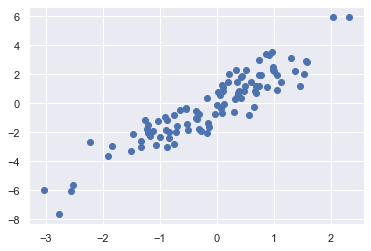

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

## Modifying Values with Fancy Indexing

In [48]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [49]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [50]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [52]:
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [54]:
y=np.arange(10)
y

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [55]:
i = [2, 3, 3, 4, 4, 4]
y[i] += 1
y

array([0, 1, 3, 4, 5, 5, 6, 7, 8, 9])

# Fast Sorting in NumPy: np.sort and np.argsort¶

In [56]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

- A related function is argsort, which instead returns the indices of the sorted elements:

In [57]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


# Sorting along rows or columns

In [58]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [59]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [60]:
# sort each row of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

# Partial Sorts: Partitioning

- Sometimes we're not interested in sorting the entire array, but simply want to find the k smallest values in the array. NumPy provides this in the np.partition function. np.partition takes an array and a number K; the result is a new array with the smallest K values to the left of the partition, and the remaining values to the right, in arbitrary order:

- Note that the first three values in the resulting array are the three smallest in the array, and the remaining array positions contain the remaining values. Within the two partitions, the elements have arbitrary order.

In [63]:
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [62]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

The result is an array where the first two slots in each row contain the smallest values from that row, with the remaining values filling the remaining slots.

Finally, just as there is a np.argsort that computes indices of the sort, there is a np.argpartition that computes indices of the partition.